In [44]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

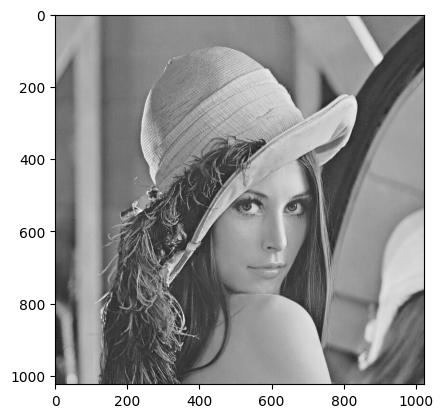

In [45]:
img_gray = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap="gray")

In [46]:
# нахождение лица на изображении
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)
face_rects = face_classifier.detectMultiScale(
    img_gray, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)
print(face_rects)
# отступ на 10%
rect = face_rects[0]
rect[0] -= rect[2] * 0.1
rect[1] -= rect[3] * 0.1
rect[2] *= 1.2
rect[3] *= 1.2
rect

[[441 416 324 324]]


array([408, 383, 388, 388])

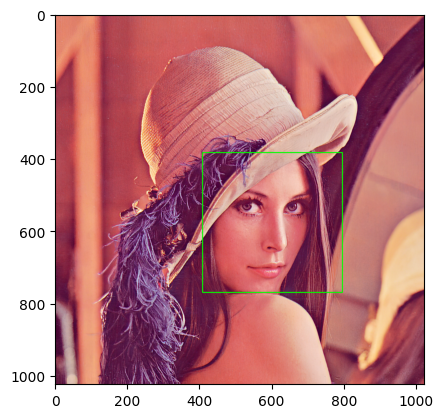

In [47]:
img_bgr = cv2.imread('lenna.png', cv2.IMREAD_COLOR)
cv2.rectangle(img_bgr, rect, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

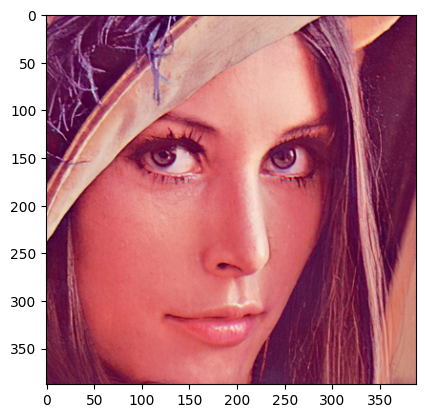

In [48]:
img = cv2.imread('lenna.png', cv2.IMREAD_COLOR)
img = img[rect[1] : rect[1] + rect[3], rect[0] : rect[0] + rect[2]]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

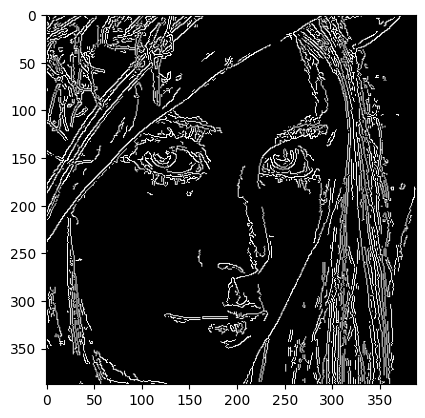

In [49]:
# нахождение границ на изображении
edges = cv2.Canny(img, 85, 170)
plt.imshow(edges, cmap="gray")

In [50]:
# нахождение угловых точек на изображении, используем исходное изображение лица
# параметры: максимум 500 угловых точек, минимальное расстояние между углами - 10 точек
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
points = cv2.goodFeaturesToTrack(img_gray, 500, 0.02, 10)
points = np.intp(points)
points.shape

(293, 1, 2)

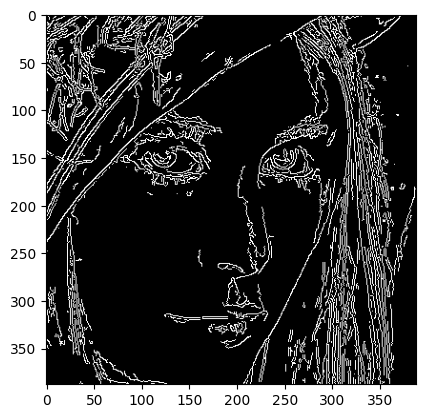

In [51]:
# в угловых точках выставляем значение пикселя в 255
for point in points:
    x,y = point.ravel()
    edges[y, x] = 255
plt.imshow(edges, cmap="gray")

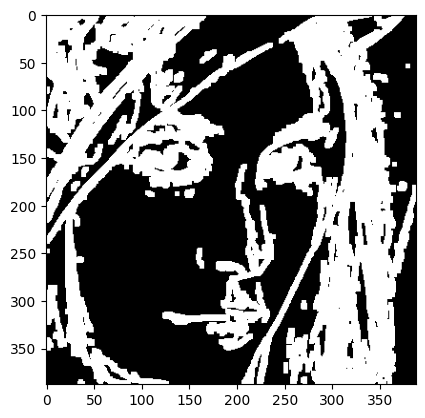

In [52]:
# операция наращивания с матрицей 5x5
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(edges, kernel, iterations = 1)
plt.imshow(dilation, cmap="gray")

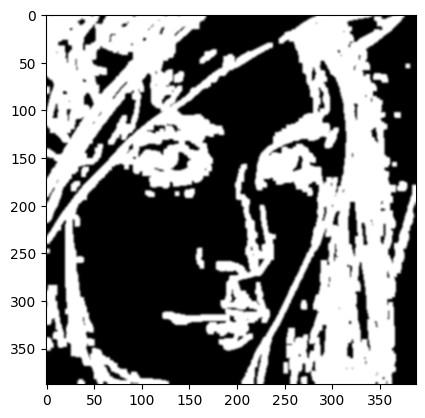

In [53]:
# размытие фильтром Гаусса, sigmaX = 0, sigmaY = 0
blur = cv2.GaussianBlur(dilation, (5,5), 0)
plt.imshow(blur, cmap="gray")

In [54]:
#нормализуем значения пикселей
normalized = (blur - np.min(blur))/np.ptp(blur)
print(normalized[0])

[1.         1.         1.         0.97647059 0.88235294 0.76470588
 0.76470588 0.88235294 0.97647059 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.94509804 0.7254902  0.4
 0.23529412 0.4        0.7254902  0.94509804 1.         1.
 0.9372549  0.68627451 0.31372549 0.0627451  0.         0.
 0.         0.0627451  0.31372549 0.68627451 0.9372549  1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.97647059 0.88235294 0.70980392
 0.48627451 0.25098039 0.14117647 0.2745098  0.57647059 0.85098039
 0.97647059 1.         1.      

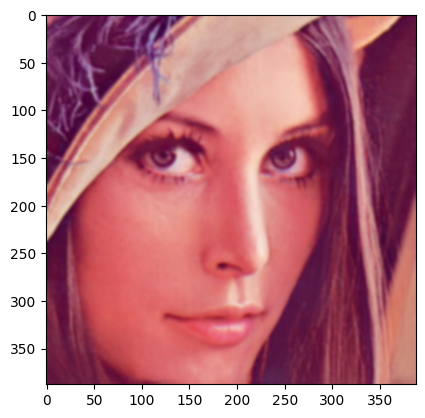

In [55]:
# размытие фильтром Гаусса, sigmaX = 0, sigmaY = 0
img_blur = cv2.GaussianBlur(img, (7,7), 0)
plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))

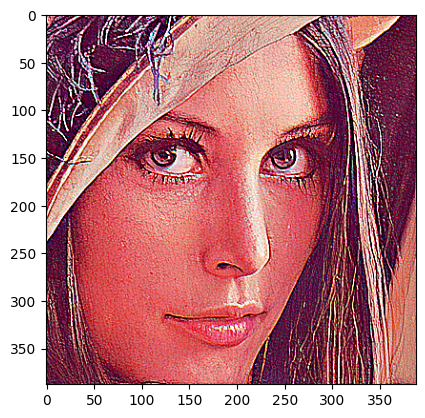

In [56]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# в hsv за насыщенность находится в первом канале
# после увеличения насыщенности некоторые значения могут переполнится в uint8
# на изображении появятся области с зелёными пятнами, чтобы этого избежать
# используем функцию clip, если результирующее значение превзойдёт 255, то в результат запишется 255
img_hsv[:,:,1] = np.clip(img_hsv[:,:,1] * 1.1, 0, 255)
img_hsv = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

# для улучшения чёткости выполним 2d конволюцию с ядром:
# [ -1, -1, -1
#   -1,  9, -1
#   -1,  9, -1 ]
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpned_img = cv2.filter2D(img_hsv, -1, kernel)
plt.imshow(cv2.cvtColor(sharpned_img, cv2.COLOR_BGR2RGB))

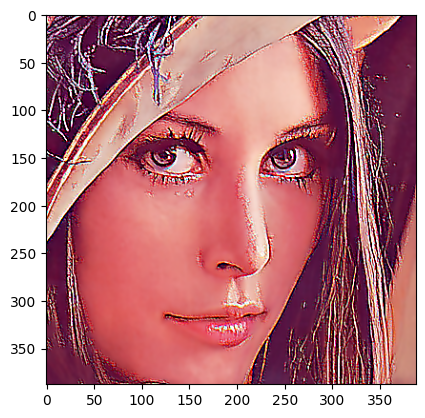

In [57]:
result_img = np.empty(img.shape, dtype=np.uint8)
for c in range(0, 3) :
    result_img[:, :, c] = normalized * sharpned_img[:, :, c] + (1 - normalized) * img_blur[:, :, c]

plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))